# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [3]:
m = ((np.mean(X)*np.mean(Y)) - np.mean(X*Y))/(np.mean(X)**2 - np.mean(X**2))
c = np.mean(Y) - m*np.mean(X)
regression_line = [(m*x)+c for x in X]
ssr = np.sum([(Y-regression_line)**2])
sst = np.sum([(Y-np.mean(Y))**2])
r_squared = 1 - (ssr/sst)

Basic Regression Diagnostics
Slope: 0.5575757575757568
Y-intercept: 6.3333333333333375
R-squared: 0.9715335169880626
Model: Y = 0.56*X + 6.33


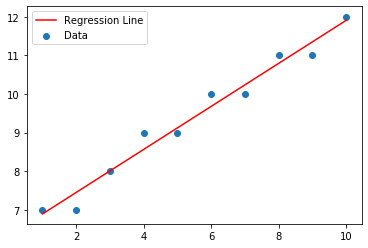

In [4]:
print('Basic Regression Diagnostics')
print('Slope: {}'.format(m))
print('Y-intercept: {}'.format(c))
print('R-squared: {}'.format(r_squared))
print('Model: Y = {}*X + {}'.format(round(m, 2), round(c, 2)))
plt.scatter(X, Y, label='Data')
plt.plot(X, regression_line, color='red', label='Regression Line')
plt.legend()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


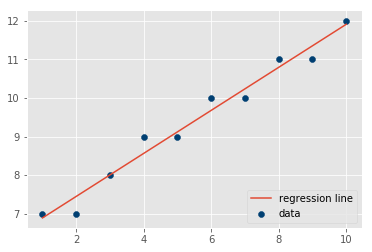

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

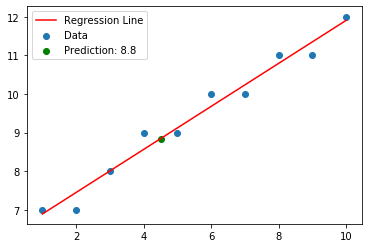

In [5]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_calc = m*x_new + c
plt.scatter(X, Y, label='Data')
plt.plot(X, regression_line, color='red', label='Regression Line')
plt.scatter(x_new, y_calc, color='green', label='Prediction: ' + str(round(y_calc, 1)))
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [6]:
import pandas as pd
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 2 columns):
height    20 non-null int64
weight    20 non-null int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [15]:
height = np.array(df.height) #x values
weight = np.array(df.weight) #y values
slope = ((np.mean(height)*np.mean(weight)) - np.mean(height*weight))/(((np.mean(height))**2) - np.mean(height**2))
intercept = np.mean(weight) - slope*np.mean(height)
regressionLine = [(slope*h)+intercept for h in height]
SSR = np.sum([(weight-regressionLine)**2])
SST = np.sum([(weight-np.mean(weight))**2])
R_Squared = 1 - (SSR/SST)

Basic Regression Diagnostics
Slope: 5.539019232705614
Y-intercept: -204.48343570637024
R-squared: 0.9553099288673668
Model: Y = 5.54*X + -204.48


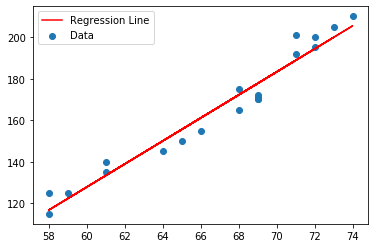

In [16]:
print('Basic Regression Diagnostics')
print('Slope: {}'.format(slope))
print('Y-intercept: {}'.format(intercept))
print('R-squared: {}'.format(R_Squared))
print('Model: Y = {}*X + {}'.format(round(slope, 2), round(intercept, 2)))
plt.scatter(height, weight, label='Data')
plt.plot(height, regressionLine, color='red', label='Regression Line')
plt.legend()

Text(0, 0.5, 'Weight')

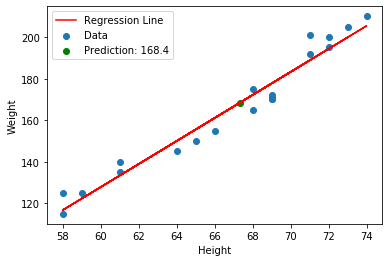

In [18]:
new_height = 67.32
new_weight = new_height*slope + intercept
plt.scatter(height, weight, label='Data')
plt.plot(height, regressionLine, color='red', label='Regression Line')
plt.scatter(new_height, new_weight, color='green', label='Prediction: ' + str(round(new_weight, 1)))
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')